In [2]:
print("hello")

hello


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sympy as sym
from collections import Counter
from patsy import dmatrices
from scipy import linalg, stats
from scipy.integrate import quad
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW, ttest_ind
from sympy import *
from sympy. stats import *
from sympy.plotting import plot3d

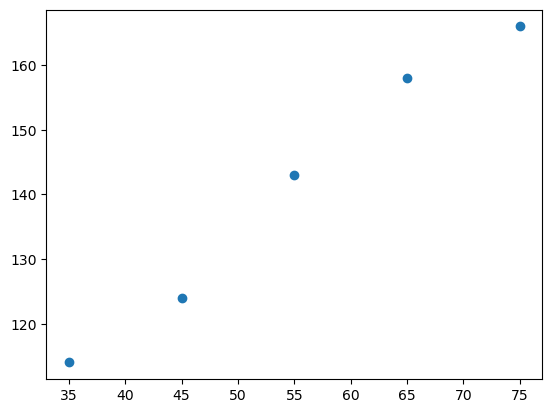

In [4]:
#7.1
x = pd.Series([35, 45, 55, 65, 75])
y = pd. Series([114, 124, 143, 158, 166])
plt.scatter(x, y);

In [5]:
#7.2
x = pd.Series([35, 45, 55, 65, 75])
y = pd. Series([114, 124, 143, 158, 166])
x.cov(y, ddof=1), np.cov(x, y, ddof=1)[0,1] # 二つの方法

(345.0, 345.0)

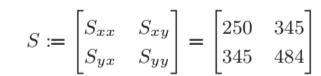

In [6]:
#7.3
np.cov(x, y, ddof=1)

array([[250., 345.],
       [345., 484.]])

In [71]:
(x - x.mean()) @ (y - y.mean()) / (len(x) - 1)

345.0

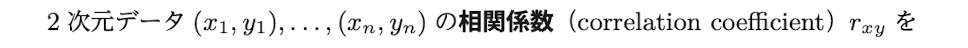
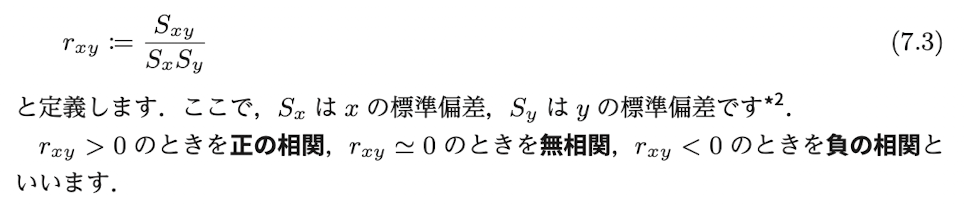

In [72]:
#7.4
x.corr(y), np.corrcoef(x, y)[0, 1]

(0.991805266143719, 0.991805266143719)

In [73]:
#不偏分散
sx = sqrt(sum(((x - x.mean())**2) / (len(x) - 1)))
sy = sqrt(sum(((y - y.mean())**2) / (len(x) - 1)))
sxy = (x - x.mean()) @ (y - y.mean()) / (len(x) - 1)
rxy = sxy/(sx * sy);rxy

0.991805266143719

In [65]:
#標本分散
sx = sqrt(sum(((x - x.mean())**2) / (len(x))))
sy = sqrt(sum(((y - y.mean())**2) / (len(x))))
sxy = (x - x.mean()) @ (y - y.mean()) / (len(x))
rxy = sxy/(sx * sy);rxy

0.991805266143719

In [67]:
S=np.cov(x, y, ddof=1)
S[0,1] / sqrt(S[0,0] * S[1,1])

0.991805266143719

In [31]:
np.corrcoef(x, y)[0, 1] / (x.var(ddof=1) * y.var(ddof=1))

8.196737736724951e-06

In [81]:
#7.5
x = pd.Series([35, 45, 55, 65, 75])
y = pd.Series([114, 124, 143, 158, 166])
data = pd.DataFrame({'x': x, 'y': y})
model = smf.ols('y ~ x', data).fit()
model.params

Intercept    65.10
x             1.38
dtype: float64

In [74]:
#7.6
model.predict({'x': 40})

0    120.3
dtype: float64

<Axes: >

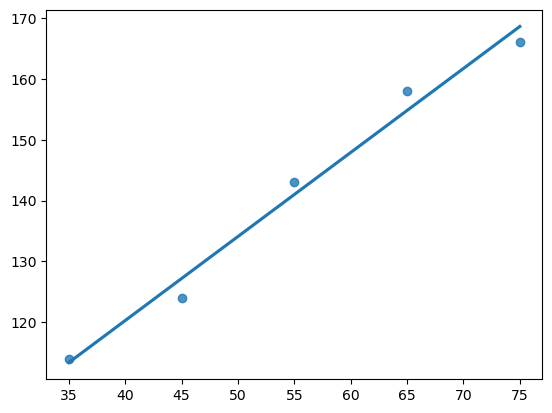

In [75]:
#7.7
sns.regplot(x=x, y=y, ci=None)

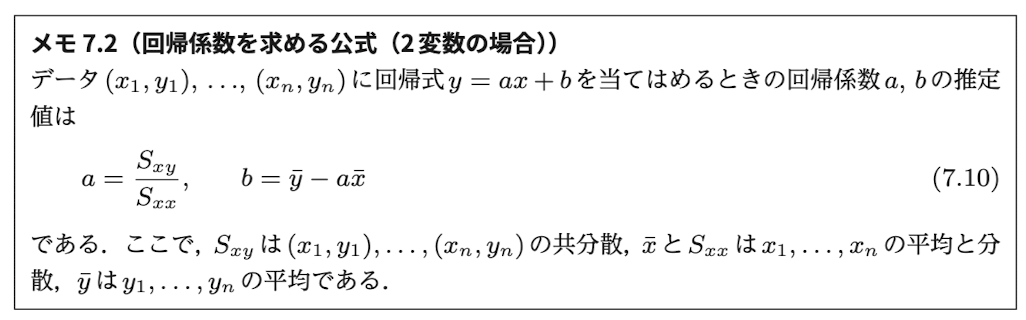

In [76]:
#7.8
S = np.cov(x, y, ddof=1)
a = S[0,1] / S[0,0]
b = y.mean() - a * x.mean()
a, b

(1.38, 65.10000000000001)

0.81642051634484
Intercept    3.000091
x            0.500091
dtype: float64


<Axes: xlabel='x', ylabel='y'>

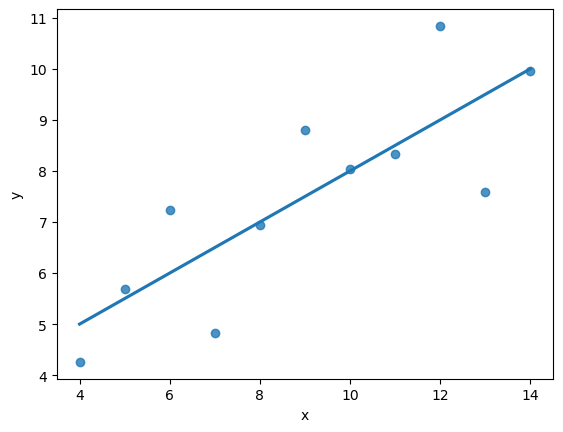

In [98]:
#7.9
anscombe = sns.load_dataset('anscombe')
data = anscombe[anscombe.dataset == 'I']
# S = np.cov(data.x, data.y, ddof=1); print(S[0,1] / sqrt(S[0,0] * S[1,1]))
print(np.corrcoef(data.x, data.y)[0, 1])
model = smf.ols('y ~ x', data).fit(); print(model.params)
sns.regplot(x=data.x, y=data.y, ci=None)